# Blatt 8

## Nr. 1a)

### Was beschreibt die Lossfunktion?

Wir betrachten zwei Wahrscheinlichkeitsdichtefunktionen $p$ und $q$. Die Lossfunktion ergibt kleinere Werte für ähnliche Verteilungen $q$ und $p$. Bei einem Klassifizierungsproblem ist $p$ die wahre Verteilung der Klassen für ein gegebenes $x$, $q(x)$ ist die geschätzte Verteilung, die vom Machine-Learner erstellt wurde. Die Loss-Funktion gibt praktisch die Abweichung der geschätzen Verteilung von der wahren Verteilung an, die pro Entscheidung entsteht. Diese Abweichung soll in Klassifikationsproblemen minimiert werden.

### Wie kann sie minimiert werden?

Die Gewichtsmatrix $\mathbf{W}$ wird minimiert. Es kann z.B. zufällig nach Matrixeinträgen gesucht werden, die eine bessere Loss-Funktion erhalten. Es geht aber auch anders. 
Oft genügt es ein lokales Optimum zu finden. Das Problem kann auch konvex umformuliert werden. Dann findet der lokale Optimierer garantiert das globale Optimum.
Man kann es mit einem inkrementellen Ansatz verschen. Dabei behalten wir das beste gefundene $\mathbf{W}$ und fügen eine zufällige Richtung hinzu. Noch besser wird man, wenn man in jeder Iteration den Gradienten der Verlustfunktion verfolgt.

### Welche Funktion haben Aktivierungsfunktionen bzw. welche Probleme werden durch sie gelöst? 


Aktivierungsfunktion soll die Aktivierung eines biologischen Neurons simulieren. Sie bestimmt die Ausgabe des künstlichen Neurons. Als Aktivierungsfunktion können nichtlineare Funktionen verwendet werden, die den Raum verzerren und somit auch linear nicht lösbare Probleme lösbar machen, ohne die Komplexität des Netzes zu erhöhen.

Gängige Aktivierungsfunktionen sind die Sigmoid-Funktion, der Tangens Hyperbolicus uns ReLu (Rectified Linear Unit).

Sie werden benutzt um in der End-/Ausgabeschicht eines Nezwerks Wahrscheinlichkeitsschätzungen anzustellen.

### Was ist ein Neuron?

Ein Neuron ist das Basisobjekt für neuronale Netze. Es kann Eingaben verarbeiten und reagieren. Ein Neuron kann durch vier Basiselemente beschrieben werden:
* Gewichtung: Die Gewichte bestimmen den Grad ds Einflusses den die Eingaben des Neurons in der Berechnung einnimmt.
* Übertragungsfunktion: Berechnet Anahnd der Gewichtung der Eingabe die Netzeingabe.
* Aktivierungsfunktion: Bestimmt die Ausgabe. Wird beeinflusst durch die Netzeingabe und einem Schwellwert.
* Schwellwert: Addieren eines Schwellenwerts verschiebt die gewichtete Eingabe. 

### Hier drei Anwendungsbeispiele für Neuronale Netze.

* Gesichtserkennung
* Spracherkennung
* Autonomes Fahren

Geberell sind neuronale Netze immer besonders sinnvoll, wenn wenig a priori Wissen über das Problem vorliegt und eine große Datenmenge verarbeitet werden muss, um wenige Ergebnisse zu erhalten.

## Nr. 2

### a) 
Dimensionen:
* $x_i = 1\times M $ 
* $C = 1\times 1 $
* $W = M\times K$
* $b = K\times 1 $

Das stimmt noch nicht: :D 
* $\nabla_{W_a} \hat{C} = K \times M $
* $\nabla_{f_{a,i}} \hat{C} = 1 \times 1 $
* $\frac{\partial f_{k,i}}{\partial W} = M \times 1 $
* $\frac{\partial f_{k,i}}{\partial b} = M \times 1 $

### b)

$\nabla_{f_{a,i}} C\left(f\right) = 
\frac{1}{m} \sum_{i=1}^{m} \left[ \sum_{k=1}^{K} -\mathbf{1}(y_i = k) \nabla_{f_{a,i}} \log\left(\frac{\exp\left(f_{k,i}\right)}{\sum_{j} \exp\left(f_{j,i}\right) }\right) \right] \\
= \frac{1}{m} \sum_{i=1}^{m} \left[-\mathbf{1}(y_i = a) \nabla_{f_{a,i}} \log\left(\frac{\exp\left(f_{k,i}\right)}{\sum_{j} \exp\left(f_{j,i}\right) }\right) \right] \\
= \frac{1}{m} \sum_{i=1}^{m} \left[-\mathbf{1}(y_i = a) \left(\frac{\sum_{j} \exp\left(f_{j,i}\right) }{\exp\left(f_{a,i}\right)}\right) \frac{\partial}{\partial f_{a,i}} \left(\frac{\exp\left(f_{k,i}\right)}{\sum_{j} \exp\left(f_{j,i}\right) }\right)  \right] \\
= \frac{1}{m} \sum_{i=1}^{m} \left[-\mathbf{1}(y_i = a) \left(\frac{\sum_{j} \exp\left(f_{j,i}\right) }{\exp\left(f_{a,i}\right)}\right) \cdot \left(\frac{\exp\left(f_{a,i}\right) \cdot \sum_{j} \exp\left(f_{a,i}\right) - {\exp\left(f_{a,i}\right)}^2}{\left(\sum_{j} \exp\left(f_{j,i}\right)\right)^{2} }\right)  \right] \\
= \frac{1}{m} \sum_{i=1}^{m} \left[\frac{\exp\left(f_{a,i}\right)}{\sum_{j} \exp\left(f_{j,i}\right) } -\mathbf{1}(y_i = a) \right]$

### c) 

Mit $ f_{k,i} = W_k x_i + b_k $ 
ergibt sich die Ableitung von $f_{k,i}$ nach $W_a$ zu 

$$ \nabla_{W_a} f_{k,i} = \nabla_{W_a}\left(W_k x_i + b_k \right) = \delta_{ak} x_i^T $$

und die Ableitung nach $b_a$ zu 

$$ \nabla_{b_a} f_{k,i} = \nabla_{b_a}\left(W_k x_i + b_k \right) = \delta_{ak}. $$

### d) 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tqdm as tqdm

In [3]:
df0 = pd.read_hdf("populationen.hdf5", key="P_0")
df1 = pd.read_hdf("populationen.hdf5", key="P_1")
y = np.concatenate([np.zeros(len(df0)), np.ones(len(df1))])
X = pd.concat([df0, df1]).values

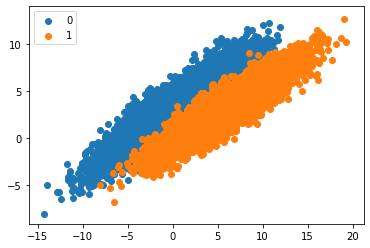

In [4]:
plt.scatter(X[:9999,0], X[:9999,1], label="0")
plt.scatter(X[10000:,0], X[10000:,1], label="1")
plt.legend(loc="best")
None

In [5]:
#learning rate h= 0.5, 100 Epochen, 2 Klassen K (1 oder 0), p (x und y)
K = 2
p = 2
h = 0.5

np.random.seed(42)
W = np.random.normal(size=(p, K)) 
b = np.random.normal(size=(p,1))
    

In [6]:
def softmax(f):
    f_new = f - f.max()
    p = np.exp(f_new).T/np.sum(np.exp(f_new), axis=1)
    return p.T

def indicator(y, k):
    if y == k:
        return 1
    else:
        return 0